<a href="https://colab.research.google.com/github/Haytam222/Deep-Learning/blob/master/Convolutional%20Neural%20Networks%20in%20Python%20with%20Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Load the Data***


***Keras*** comes with a library ***called datasets***, which you can use to load datasets out of the box : you download the data from the server and speeds up the process since you no longer have to download the data to your computer. The **train** and *test* images along with the labels are loaded and stored in variables ***train_X, train_Y, test_X, test_Y,*** respectively.

In [1]:
from keras.datasets import fashion_mnist 
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


**Great !** That was pretty simple, wasn't it **?**

> **Y**ou have probably done this a million times by now, but it's always an essential step to get started. Now you're completely set to start analyzing, processing and modeling your data!




# ***Analyze the Data***

**L**et's now analyze how images in the dataset look like. Even though you know the dimension of the images by now, it's still worth the effort to analyze it programmatically : you might have to rescale the image pixels and resize the images.

In [2]:
import numpy as np 
from keras.utils import to_categorical 
import matplotlib.pyplot as plt 
%matplotlib inline 

print('Training data shape : ', train_X.shape, train_Y.shape) 
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


**F**rom the above output, you can see that the training data has a shape of **(60000,28,28)** since there are **60,000** training samples each of **(28,28)** dimension. Similarly, the test data has a shape of **(10000,28,28)** since there are **10,000** *testing samples*.

In [3]:
# Find the unique numbers from the train labels 

classes = np.unique(train_Y) 
nClasses = len(classes) 

print('Total number of outputs : ', nClasses) 
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


**T**here's also a total of ten output classes that range from **0 to 9.** 




**A**lso, don't forget to take a look at what the images in your dataset :

Text(0.5, 1.0, 'Ground Truth : 9')

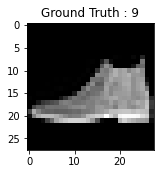

In [4]:
plt.figure(figsize=[5,5])

# Display the first image in training data 

plt.subplot(121) 
plt.imshow(train_X[0,:,:], cmap='gray') 
plt.title("Ground Truth : {}".format(train_Y[0])) 

# Display the first image in testing data plt.subplot(122)

plt.imshow(test_X[0,:,:], cmap='gray') 
plt.title("Ground Truth : {}".format(test_Y[0]))


**T**he output of above two plots looks like an ankle boot, and **this class is assigned a class label of 9**. Similarly, other fashion products will have different labels, but similar products will have same labels. This means that all the 7,000 ankle boot images will have a class label of 9.

#***Data Preprocessing***

**A**s you could see in the above plot, **the images are grayscale images have pixel values that range from 0 to 255**. Also, these images have a dimension of (28,28). As a result, you'll need to preprocess the data before you feed it into the model.



*   **A**s a first step, convert each **(28,28)** image of the train and test set into a matrix of size **(28,28,1)** which is fed into the network.
 



In [5]:
train_X = train_X.reshape(-1, 28,28, 1) 
test_X = test_X.reshape(-1, 28,28, 1)

print(train_X.shape, test_X.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)




*   **T**he data right now is in an int8 format, so before you feed it into the network you need to convert its type to float32, and you also have to rescale the pixel values in range 0 - 1 inclusive. ***So let's do that!***




In [6]:
train_X = train_X.astype('float32') 
test_X = test_X.astype('float32') 
train_X = train_X / 255. 
test_X = test_X / 255.



*   **N**ow you need to convert the class labels into a **one-hot encoding vector**. In **one-hot encoding**, you convert **the categorical data into a vector of numbers**. The reason why you convert the categorical data in one hot encoding is that machine learning algorithms cannot work with categorical data directly. You generate one boolean column for each category or class. Only one of these columns could take on the value 1 for each sample. Hence, the term one-hot encoding. For your problem statement, the one hot encoding will be a row vector, and for each image, it will have a dimension of **(1,10)** . The important thing to note here is that the vector consists of all zeros except for the class that it represents, and for that, it is 1. *For example, the ankle boot image that you plotted above has a label of 9, so for all the ankle boot images, the one hot encoding vector would be **[ 0 0 0 0 0 0 0 0 1 0 ]** . So let's convert the training and testing labels into one-hot encoding vectors:*




In [7]:
# Change the labels from categorical to one-hot encoding 

train_Y_one_hot = to_categorical(train_Y) 
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding 

print('Original label:', train_Y[0]) 
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


**That's pretty clear, right ?** Note that you can also print the ***train_Y_one_hot***, which will display a matrix of size (60000,10) in which each row depicts *one-hot encoding of an image*.



*   **T**his last step is a crucial one . In machine learning or any data specific task, you should partition the data correctly. For the model to generalize well, you split the training data into two parts, one designed for training and another one for validation. In this case, you will train the model on **80 %** of the training data and validate it on **20 %** of the remaining training data. This will also help to reduce overfitting since you will be validating the model on the data it would not have seen in training phase, which will help in boosting the test performance.
  



In [8]:
from sklearn.model_selection import train_test_split 

train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

**F**or one last time let's check the shape of **training and validation set**.

In [9]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

#***The Network***


**T**he images are of size **(28,28)** . You convert the image matrix to an array, *rescale it between 0 and 1*, reshape it so that it's of size **(28,28,1)** , and feed this as an input to the network.



**You'll use three convolutional layers:**


*   **T**he first layer will have **(32,(3,3))** *filters*.
*   **T**he second layer will have **(64,(3,3))** *filters* .
*   **T**he third layer will have **(128,(3,3))** *filters*.

**I**n addition, there are three max-pooling layers each of size **(2,2)**.



#***Model the Data***

**F**irst, let's import all the necessary modules required to train the model.

In [10]:
from keras.models import Sequential
from keras.models import Input,Model 
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers.normalization import BatchNormalization 
from keras.layers.advanced_activations import LeakyReLU

**Y**ou will use a batch size of 64 using a higher batch size of 128 or 256 is also preferable it all depends on the memory. It contributes massively to determining the learning parameters and affects the prediction accuracy. You will train the network for **20 epochs**.

In [11]:
batch_size = 64 
epochs = 20 
num_classes = 10

#***Neural Network Architecture***

**I**n Keras, you can just stack up layers by adding the desired layer one by one. That's exactly what you'll do here: you'll first add a first ***convolutional layer with Conv2D()***. Note that you use this function because you're working with images! Next, you add the ***Leaky ReLU activation function*** which helps the network learn ***non-linear decision boundaries***. Since you have ten different classes, you'll need a non-linear decision boundary that could separate these ten classes which are not linearly separable. More specifically, you add ***Leaky ReLUs*** because they attempt to fix the problem of dying ***Rectified Linear Units (ReLUs)***. The **ReLU** activation function is used a lot in neural network architectures and more specifically in convolutional networks, where it has proven to be more effective than the widely used logistic sigmoid function. As of 2017, this activation function is the most popular one for deep neural networks. The ReLU function allows the activation to be thresholded at zero. However, during the training, ReLU units can "die". This can happen when a large gradient flows through a ReLU neuron: it can cause the weights to update in such a way that the neuron will never activate on any data point again. If this happens, then the gradient flowing through the unit will forever be zero from that point on. Leaky ReLUs attempt to solve this: the function will not be zero but will instead have a small negative slope. Next, you'll add the **max-pooling layer with MaxPooling2D()** and so on. The last layer is a Dense layer that has a softmax activation function with 10 units, which is needed for this multi-class classification problem.

In [12]:
fashion_model = Sequential()

fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))

fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))

# ***Compile the Model***

**A**fter the model is created, you compile it using the **Adam optimizer**, one of the most popular **optimization algorithms**. 

**A**dditionally, you specify the loss type which is ***categorical cross entropy*** which is used for ***multi-class classification,*** you can also use binary cross-entropy as the loss function.

**L**astly, you specify the **metrics as accuracy** which you want to analyze while the model is training.

In [13]:
fashion_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

***L***et's visualize the layers that you created in the above step by using the summary function. This will show some parameters ***(weights and biases)*** in each layer and also the total parameters in your ***model***.

In [14]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

#***Train the Model***

***I***t's finally time to train the model with ***Keras fit() function*** ! The model trains for ***20 epochs***. ***The fit()*** function will return a history object , By storying the result of this function in ***fashion_train***, you can use it later to plot the **accuracy** and *loss* function plots between *training and validation* which will help you to analyze your model's performance visually.

In [15]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 85s 2ms/step - loss: 0.4666 - accuracy: 0.8303 - val_loss: 0.3328 - val_accuracy: 0.8825
Epoch 2/20
48000/48000 [==============================] - 84s 2ms/step - loss: 0.2867 - accuracy: 0.8947 - val_loss: 0.2887 - val_accuracy: 0.8955
Epoch 3/20
48000/48000 [==============================] - 84s 2ms/step - loss: 0.2387 - accuracy: 0.9119 - val_loss: 0.2387 - val_accuracy: 0.9130
Epoch 4/20
48000/48000 [==============================] - 85s 2ms/step - loss: 0.2072 - accuracy: 0.9228 - val_loss: 0.2384 - val_accuracy: 0.9139
Epoch 5/20
48000/48000 [==============================] - 85s 2ms/step - loss: 0.1813 - accuracy: 0.9327 - val_loss: 0.2335 - val_accuracy: 0.9176
Epoch 6/20
48000/48000 [==============================] - 85s 2ms/step - loss: 0.1589 - accuracy: 0.9404 - val_loss: 0.2158 - val_accuracy: 0.9225
Epoch 7/20
48000/48000 [==============================] - 85s 2ms/st

***Finally !*** You trained the model on ***fashion-MNIST*** for ***20 epochs***, and by observing the training accuracy and loss, you can say that the model did a good job since after **20 epochs** the *training accuracy* is **99%** and the training loss is quite low.

**H**owever, it looks like the model is overfitting, as the validation *loss is 0*.4396 and the validation accuracy is **92%** . Overfitting gives an intuition that the network has memorized the training data very well but is not guaranteed to work on unseen data, and that is why there is a difference in the training and validation accuracy.

**Y**ou probably need to handle this. In next sections, you'll learn how you can make your model perform much better by adding a Dropout layer into the network and keeping all the other layers unchanged.

**B**ut first, let's evaluate the performance of your model on the test set before you come on to a conclusion.

#***Model Evaluation on the Test Set***

In [16]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1) 

print('Test loss:', test_eval[0]) 
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 5s 537us/step
Test loss: 0.49063668894581497
Test accuracy: 0.9138000011444092


**T**he test accuracy looks impressive. ***Are these results really all that good ?*** , Let's put your model evaluation into perspective and plot the accuracy and loss plots between training and validation data:

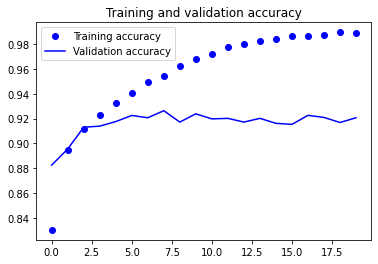

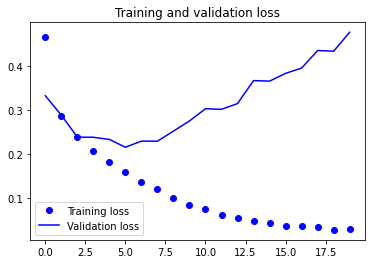

In [17]:
accuracy = fashion_train.history['accuracy'] 
val_accuracy = fashion_train.history['val_accuracy'] 
loss = fashion_train.history['loss'] 
val_loss = fashion_train.history['val_loss'] 
epochs = range(len(accuracy)) 
plt.plot(epochs, accuracy, 'bo', label='Training accuracy') 
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy') 
plt.title('Training and validation accuracy') 
plt.legend() 
plt.figure() 
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.legend() 
plt.show()

**F**rom the above two plots, you can see that the validation accuracy almost became stagnant after 4-5 epochs and rarely increased at certain epochs. In the beginning, the validation accuracy was linearly increasing with loss, but then it did not increase much. The validation loss shows that this is the sign of overfitting, similar to validation accuracy it linearly decreased but after 4-5 epochs, it started to increase. This means that the model tried to memorize the data and succeeded.

 With this in mind, it's time to introduce some dropout into our model and see if it helps in **reducing overfitting**.

#***Adding Dropout into the Network***

You can add a dropout layer to overcome the problem of overfitting to some extent. Dropout randomly turns off a fraction of neurons during the training process, reducing the dependency on the training set by some amount. How many fractions of neurons you want to turn off is decided by a hyperparameter, which can be tuned accordingly. This way, turning off some neurons will not allow the network to memorize the training data since not all the neurons will be active at the same time and the inactive neurons will not be able to learn anything.

**S**o let's create, compile and train the network again but this time with dropout. And run it for 20 epochs with a batch size of 64.

In [18]:
batch_size = 64 
epochs = 20 
num_classes = 10 
fashion_model = Sequential() 
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1))) 
fashion_model.add(LeakyReLU(alpha=0.1)) 
fashion_model.add(MaxPooling2D((2, 2),padding='same')) 
fashion_model.add(Dropout(0.25)) 

fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same')) 
fashion_model.add(LeakyReLU(alpha=0.1)) 
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same')) 
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same')) 
fashion_model.add(LeakyReLU(alpha=0.1)) 
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same')) 
fashion_model.add(Dropout(0.4)) 

fashion_model.add(Flatten()) 
fashion_model.add(Dense(128, activation='linear')) 
fashion_model.add(LeakyReLU(alpha=0.1)) 
fashion_model.add(Dropout(0.3)) 
fashion_model.add(Dense(num_classes, activation='softmax')) 


fashion_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)         

In [19]:

fashion_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 91s 2ms/step - loss: 0.5953 - accuracy: 0.7779 - val_loss: 0.3688 - val_accuracy: 0.8672
Epoch 2/20
48000/48000 [==============================] - 91s 2ms/step - loss: 0.3749 - accuracy: 0.8627 - val_loss: 0.3153 - val_accuracy: 0.8871
Epoch 3/20
48000/48000 [==============================] - 91s 2ms/step - loss: 0.3273 - accuracy: 0.8791 - val_loss: 0.2728 - val_accuracy: 0.8999
Epoch 4/20
48000/48000 [==============================] - 91s 2ms/step - loss: 0.3014 - accuracy: 0.8885 - val_loss: 0.2698 - val_accuracy: 0.8994
Epoch 5/20
48000/48000 [==============================] - 91s 2ms/step - loss: 0.2834 - accuracy: 0.8942 - val_loss: 0.2557 - val_accuracy: 0.9078
Epoch 6/20
48000/48000 [==============================] - 90s 2ms/step - loss: 0.2704 - accuracy: 0.8994 - val_loss: 0.2426 - val_accuracy: 0.9108
Epoch 7/20
48000/48000 [==============================] - 90s 2ms/st

**L**et's save the model so that you can directly load it and not have to train it again for **20 epochs** . **This way** , you can load the model later on if you need it and modify the architecture ; Alternatively, you can start the training process on this **saved model** . It is always a good idea to save the model and even the model's weights! because it saves you time. Note that you can also save the model after every epoch so that, if some issue occurs that stops the training at an epoch, you will not have to start the training from the beginning.

In [20]:
fashion_model.save("fashion_model_dropout.h5py")

# ***Model Evaluation on the Test Set***

**F**inally, let's also evaluate your new model and see how it performs!

In [21]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

10000/10000 [==============================] - 6s 553us/step


In [22]:
print('Test loss:', test_eval[0]) 
print('Test accuracy:', test_eval[1])

Test loss: 0.21905140578746796
Test accuracy: 0.9204999804496765


**Wow!** Looks like adding Dropout in our model worked, even though the test accuracy did not improve significantly but the test loss decreased compared to the previous results.

**Now**, let's plot the accuracy and loss plots between training and validation data for the one last time.

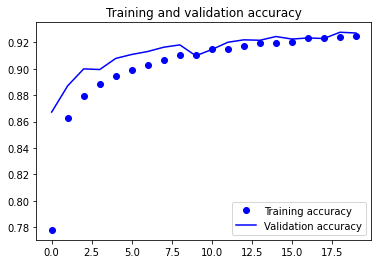

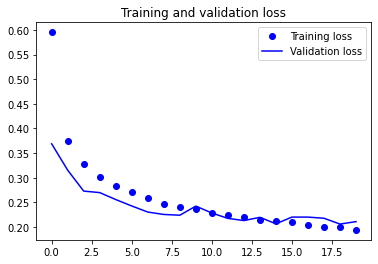

In [23]:
accuracy = fashion_train_dropout.history['accuracy'] 
val_accuracy = fashion_train_dropout.history['val_accuracy'] 
loss = fashion_train_dropout.history['loss'] 
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy)) 
plt.plot(epochs, accuracy, 'bo', label='Training accuracy') 
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy') 
plt.title('Training and validation accuracy') 
plt.legend() 
plt.figure() 

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend() 
plt.show()

**Finally**, you can see that the validation loss and validation accuracy both are in sync with the training loss and training accuracy. Even though the validation loss and accuracy line are not linear, but it shows that your model is not overfitting : the validation loss is decreasing and not increasing, and there is not much gap between training and validation accuracy.

**Th**erefore, you can say that your model's generalization capability became much better since the loss on both test set and validation set was only slightly more compared to the training loss.

# ***Predict Labels***

In [24]:
predicted_classes = fashion_model.predict(test_X)

In [25]:
print(predicted_classes[0])

[1.3616358e-10 1.1615225e-11 1.7311125e-11 4.9187241e-11 1.1301758e-10
 4.4741378e-06 9.6012323e-11 9.5724616e-05 1.0927449e-11 9.9989974e-01]


Since the predictions you get are floating point values, it will not be feasible to compare the predicted labels with true test labels. So, you will round off the output which will convert the float values into an integer. Further, you will use **np.argmax()** to select the index number which has a higher value in a row. For example, let's assume a prediction for one test image to be 0 1 0 0 0 0 0 0 0 0, the output for this should be a class label 1.

In [26]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


In [27]:
predicted_classes.shape, test_Y.shape


((10000,), (10000,))

Found 9180 correct labels


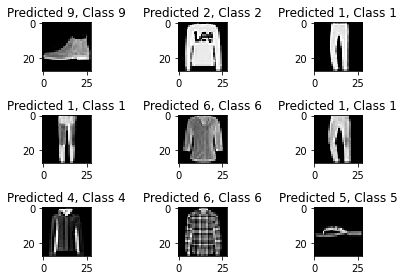

In [29]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
  plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
  plt.tight_layout()

Found 820 incorrect labels


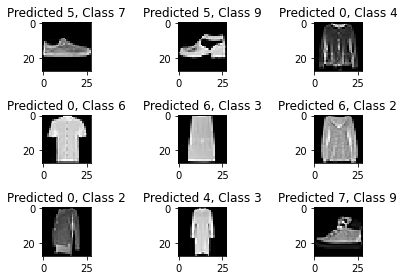

In [30]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
  plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
  plt.tight_layout()

By looking at a few images, you cannot be sure as to why your model is not able to classify the above images correctly, but it seems like a variety of the similar patterns present on multiple classes affect the performance of the classifier although CNN is a robust architecture. For example, images 5 and 6 both belong to different classes but look kind of similar maybe a jacket or perhaps a long sleeve shirt.

# ***Classification Report***

**Classification report** will help us in identifying the misclassified classes in more detail. You will be able to observe for which class the model performed bad out of the given ten classes.

In [31]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))


              precision    recall  f1-score   support

     Class 0       0.76      0.93      0.84      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.89      0.88      0.89      1000
     Class 3       0.93      0.91      0.92      1000
     Class 4       0.86      0.89      0.88      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.85      0.69      0.76      1000
     Class 7       0.94      0.99      0.96      1000
     Class 8       0.99      0.98      0.98      1000
     Class 9       0.99      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

